# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part A): Object Recognition [75%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keeping the same structure**: retain the questions, and avoid adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [21]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np
import pandas as pd
import scipy.stats.stats as stats
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from utils.plotter import scatter_jitter, plot_confusion_matrix,plot_SVM_DecisionBoundary
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

In [22]:
# (a) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Train.csv')
image_a_train = pd.read_csv(data_path, delimiter = ',')
is_person = image_a_train["is_person"]
is_person.to_frame()

,is_person
0,1
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,1
9,0


In [23]:
# (b) # Your Code goes here:
image_a_train.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.017200,0.025323,0.088390,0.045867,0.048256,0.449116,0.040134,0.015289,0.032489,0.050167
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.130048,0.157140,0.283929,0.209247,0.214358,0.497523,0.196320,0.122729,0.177338,0.218342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(c) ***Your answer goes here:***
There are 1 ID attribute,500 dimensional attributes and 19 class attributes in dataset. And the minimums of all dimensional attributes and class attributes are 0. For dimensional attributes,the maximum of them are all less than 1.For class attributes,the maximum of them are 1. In the dataset, the person always appear in the picture.So the mean of the 'is_person' class are much higher than others.


### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

In [24]:
# (a) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Test.csv')
image_a_test = pd.read_csv(data_path, delimiter = ',')
is_person_t = image_a_test["is_person"]
is_person_t.to_frame()

,is_person
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [25]:
# (b) # Your Code goes here:
image_a_test.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.017071,0.022462,0.088949,0.045822,0.045822,0.473495,0.041330,0.014376,0.029650,0.048518
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.129594,0.148247,0.284798,0.209193,0.209193,0.499521,0.199141,0.119087,0.169695,0.214954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(c) ***Your answer goes here:***
There are 1 ID attribute and 500 dimensional attributes and 19 class attributes in dataset. It is similar to the training dataset.

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

In [26]:
# (a) # Your Code goes here:
colu = image_a_train.columns.values.tolist()
x_c = colu[1:501]
y_c = colu[501:520]

X_tr = image_a_train.copy(deep=True)
for i in image_a_train.columns.values:
    if i in y_c:
        X_tr = X_tr.drop(i,axis=1) 
X_tr = X_tr.drop("imgId",axis=1)
y_tr = image_a_train.copy(deep=True)
for i in image_a_train.columns.values:
    if i in x_c:
        y_tr = y_tr.drop(i,axis=1)
y_tr = y_tr.drop("imgId",axis=1)       
X_tst = image_a_test.copy(deep=True)

for j in image_a_test.columns.values:
    if j in y_c:
        X_tst = X_tst.drop(j,axis=1) 
X_tst = X_tst.drop("imgId",axis=1)
y_tst = image_a_test.copy(deep=True)
for j in image_a_test.columns.values:
    if j  in x_c:
        y_tst =y_tst.drop(j,axis=1)
y_tst = y_tst.drop("imgId",axis=1)

print("X_tr: ",X_tr.shape[0],X_tr.shape[1])
print("y_tr: ",y_tr.shape[0],y_tr.shape[1])
print("X_tst: ",X_tst.shape[0],X_tst.shape[1])
print("y_tst: ",y_tst.shape[0],y_tst.shape[1])

X_tr:  2093 500
y_tr:  2093 19
X_tst:  1113 500
y_tst:  1113 19


Text(0,0.5,'Count')

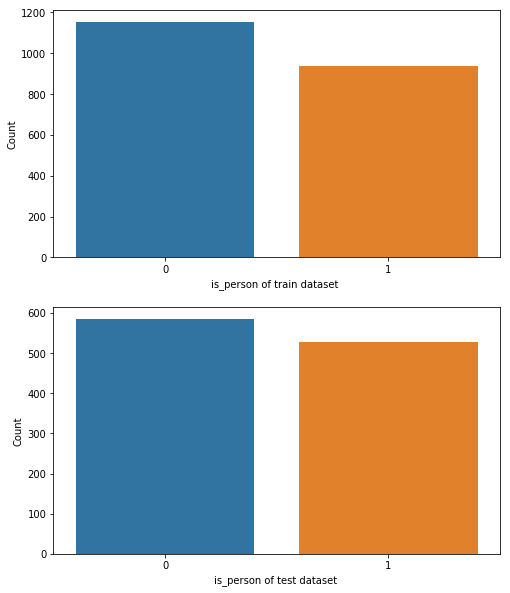

In [27]:
# (b) # Your Code goes here:
isper_tr = y_tr["is_person"]
isper_tr = y_tst["is_person"]
plt.subplots(2, figsize=(8,10))
plt.subplot(2, 1, 1)
sns.countplot(x='is_person', data=y_tr)
plt.xlabel('is_person of train dataset ')
plt.ylabel('Count')
plt.subplot(2, 1, 2)
sns.countplot(x='is_person', data=y_tst)
plt.xlabel('is_person of test dataset ')
plt.ylabel('Count')

(c) ***Your answer goes here:***
Through two countplots,we can find that the number of pictures with person and the number of picture without person are closed to each other.And the distribution is similar in train dataset and test dataset.It will cause that we couldn't find the overffiting when we fit the data into test dataset.The accuracy is a good metric to evaluate the model.Because the class is balanced in this question. 

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

(a) ***Your answer goes here:***
I just calculate the the number of the picture without person and the proportion of the sum of the picture. And I use this proportion as baseline. When you want to choose the picture with person from the dataset, the proportion could present the accuracy.

In [28]:
# (b) # Your Code goes here:

no_person =image_a_train.groupby("is_person").size()[0]
person =image_a_train.groupby("is_person").size()[1]
ca = person/(no_person+person)
print("baseline : ",ca)

baseline :  0.44911610129001434


### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

In [29]:
# (a) # Your Code goes here:
y_t = y_tr["is_person"]
y_ts = y_tst["is_person"]
lr= LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_t)
ts_pred = lr.predict(X=X_tst)
ac = accuracy_score(y_ts,lr.predict(X_tst))
print("LogisticRegression: ",ac)


LogisticRegression:  0.5265049415992812


(b) ***Your answer goes here:***
 The logistic Regression model has a better performance than the baseline model according to the accuracy.But it is not good enough maybe due to the overfitting of model.

[[586   0]
 [527   0]]


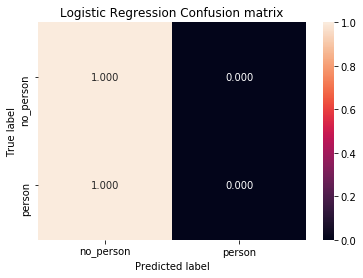

In [30]:
# (c) # Your Code goes here:

class_names =["no_person","person"]

cm = confusion_matrix(y_ts,ts_pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Logistic Regression Confusion matrix')
plt.show()

(d) ***Your answer goes here:***
The confusion matrix shows that the logistic predict all the value into the no_person class and so the accuracy is nearly 50%.From question 1.1, We can find that the mean of "is_person" class is nearly 50% and  '75%' of the "is_person" is 1.It means person has higher frequency than other. The number of the picture without person is higher than it with person.Maybe overfitting of model causes this problem.


### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(c)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

(a) ***Your answer goes here:***
I should only preprocess the training dataset. Since preprocessing the training dataset could help to get more accurate model, meanwhile we should keep the original testing dataset to judge the accuracy of the model.Through the scale preprocessing,some independent features could be transformed into standard normally distributed data which is better for training model.


In [31]:
# (b) # Your Code goes here:
X_train = preprocessing.scale(X_tr)
X_test = preprocessing.scale(X_tst)

LogisticRegression:  0.6424079065588499
[[409 177]
 [221 306]]


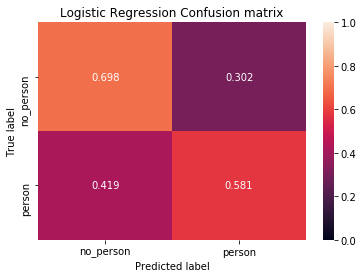

In [32]:
# (c) # Your Code goes here:
y_t = y_tr["is_person"]
y_ts = y_tst["is_person"]
lr= LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_t)
ts_pred = lr.predict(X=X_test)
ac = accuracy_score(y_ts,lr.predict(X_test))
print("LogisticRegression: ",ac)
class_names =["no_person","person"]
cm = confusion_matrix(y_ts,ts_pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Logistic Regression Confusion matrix')
plt.show()

(d) ***Your answer goes here:***
The performance of model trained on the scaled training dataset is better than the one trained on the no-scaled trainning dataset accordding to the accuracy and confusion matrix.


### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

(a) ***Your answer goes here:***
The cross-validation can help us make good use of the dataset when the dataset is not too large. And it could reduce the influence brought by the overfitting since the model can test on different parts of dataset.

In [33]:
# (b) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Train.csv')
image_b_train = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Test.csv')
image_b_test = pd.read_csv(data_path, delimiter = ',')
colu = image_b_train.columns.values.tolist()
x_c = colu[0:500]
y_c = colu[500:519]

X_train = image_b_train.copy(deep=True)
for i in image_b_train.columns.values:
    if i in y_c:
        X_train = X_train.drop(i,axis=1) 
X_train = X_train.drop("imgId",axis=1)
y_train = image_b_train.copy(deep=True)
for i in image_b_train.columns.values:
    if i in x_c:
        y_train = y_train.drop(i,axis=1)
y_train = y_train.drop("imgId",axis=1)  
X_test = image_b_test.copy(deep=True)

for j in image_b_test.columns.values:
    if j in y_c:
        X_test = X_test.drop(j,axis=1) 
X_test = X_test.drop("imgId",axis=1)
y_test = image_b_test.copy(deep=True)
for j in image_b_test.columns.values:
    if j  in x_c:
        y_test =y_test.drop(j,axis=1)
y_test = y_test.drop("imgId",axis=1)

y_train = y_train["is_person"]
y_test = y_test["is_person"]
print("X_train: ",X_train.shape[0],X_train.shape[1])
print("y_train: ",y_train.shape[0])
print("X_test: ",X_test.shape[0],X_test.shape[1])
print("y_test: ",y_test.shape[0])



X_train:  2093 500
y_train:  2093
X_test:  1113 500
y_test:  1113


In [34]:
# (c) # Your Code goes here:
C =[]
step_length = 5
num_steps = 15
ini = 1e-5
for i in range(num_steps):
    C.append(ini*5**i)
mean =[]
std = []
kf = KFold(n_splits=5,random_state=0, shuffle=True)
kf.get_n_splits(X_train)
for i in C: 
    acc = []
    for train_index, test_index in kf.split(X_train):
        X_tr, X_te = X_train.T[train_index], X_train.T[test_index]
        y_tr, y_te = y_train[train_index], y_train[test_index]
        lr= LogisticRegression(solver='lbfgs',C = i)
        lr.fit(X_tr.T, y_tr)
        ts_pred = lr.predict(X=X_te.T)
        ac = accuracy_score(y_te,ts_pred)
        acc.append(ac)
    me = np.mean(acc)
    mean.append(me)
    st = np.std(acc)
    std.append(st)
    print("C: ",i,"mean of accuracy:",me,"standard variance:",st)

index = np.argmax(mean)
print("best c ", C[index]," accuracy:" ,mean[index])

C:  1e-05 mean of accuracy: 0.5628107478503157 standard variance: 0.02828592817719275
C:  5e-05 mean of accuracy: 0.6574208356647749 standard variance: 0.010906796201610522
C:  0.00025 mean of accuracy: 0.6793870116819496 standard variance: 0.029256044326287763
C:  0.00125 mean of accuracy: 0.7013611812129585 standard variance: 0.03559655832762587
C:  0.00625 mean of accuracy: 0.6966027566203424 standard variance: 0.022967628867019498
C:  0.03125 mean of accuracy: 0.6684244784232224 standard variance: 0.010321887039155608
C:  0.15625 mean of accuracy: 0.6560036998549748 standard variance: 0.012530838634463812
C:  0.7812500000000001 mean of accuracy: 0.6474072466912563 standard variance: 0.01327427065466792
C:  3.9062500000000004 mean of accuracy: 0.6426305512098753 standard variance: 0.012615883416854622
C:  19.53125 mean of accuracy: 0.6416747553413802 standard variance: 0.014425051094066006
C:  97.65625000000001 mean of accuracy: 0.6416747553413801 standard variance: 0.01394080879281

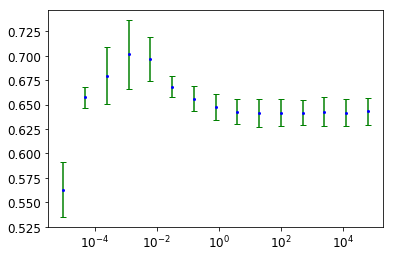

In [35]:
# (d) # Your Code goes here:
3#plt.figure(1)
plt.errorbar(C,mean,yerr = std,ecolor ='g',color='b',fmt ='.',capsize= 3,ms=4)
plt.xscale('log')
plt.tick_params(axis='both',which='major',labelsize=12)


(e) ***Your answer goes here:***
The suitable C parameter of model could improve the accuracy of the model a lot.In this experiment,when C is set as 0.00125,the accuracy of the model can achieve 70%.The smaller C means a Stronger regularization. Because in this model,we have a lot features(500 dimensions) to predict the object in picture,so Regularization will help the model better in generalization and reduce the influence brought by the overfitting.

In [36]:
# (f) # Your Code goes here:
lr= LogisticRegression(solver='lbfgs',C = C[index])
lr.fit(X_train, y_train)
ts_pred = lr.predict(X=X_test)
ac = accuracy_score(y_test,ts_pred)
print("accuracy:" ,ac)

accuracy: 0.6981132075471698


### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


(a) ***Your answer goes here:***
The random forest classfier choose random n objects from dataset to build n_estimators trees.Then put input into every decision tree,and pick the class which are choosed most in forest as the result.

In [37]:
# (b) # Your Code goes here:
rfc = RandomForestClassifier(n_estimators=500,random_state=42,criterion="entropy")
rfc.fit(X_train, y_train)
pred_t =rfc.predict(X_test)
act = accuracy_score(y_test,pred_t)
pred =rfc.predict(X_train)
ac = accuracy_score(y_train,pred)
print("testing dataset: ",act)
print("training dataset: ",ac)

testing dataset:  0.6990116801437556
training dataset:  1.0


(c) ***Your answer goes here:***
In training dataset and testing dataset,the accuracy acheive 1.0 and 0.6990116801437556 respectively.Because in the training dataset,some decision trees in the forest can predict the class accurately,becuase they just use the training data to build this tree.But in test dataset, it will have some new data ,which may leads to lower accuracy.


In [38]:
# (d) # Your Code goes here:
importance = rfc.feature_importances_
idx = np.argsort(importance)[-10:]
for i in idx:
    print("name:",x_c[i],"importance:",importance[i])

    


name: dim343 importance: 0.004607269431172574
name: dim461 importance: 0.0046216057848217215
name: dim283 importance: 0.004895872489206538
name: dim263 importance: 0.0052295800157231755
name: dim4 importance: 0.005275064535553397
name: dim479 importance: 0.005763880688970136
name: dim76 importance: 0.005764082810280144
name: dim360 importance: 0.005959730254662118
name: dim51 importance: 0.006375500505144436
name: dim21 importance: 0.0065858368799621625


### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotters` module), plot the decision boundary for all three classifiers.<br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

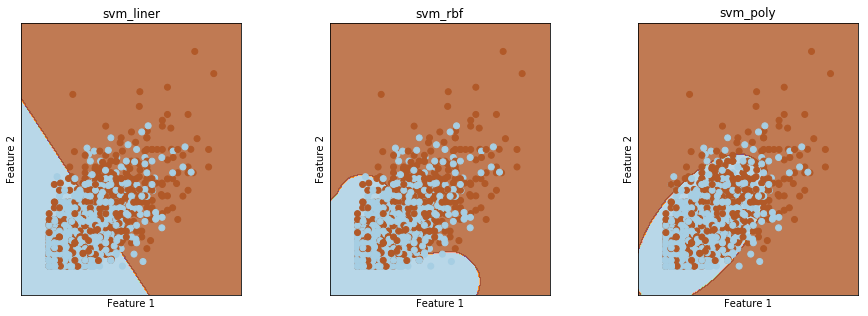

In [39]:
# (a) # Your Code goes here:
c=1
X= image_b_train.loc[:, ["dim21","dim51"]]  
X = X.values
svm_liner = svm.SVC(kernel ='linear',C =c)
svm_liner.fit(X,y_train)
svm_rbf = svm.SVC(kernel= 'rbf',gamma='auto',C=c)
svm_rbf.fit(X,y_train)
svm_poly = svm.SVC(kernel ='poly',degree = 2,C=c)
svm_poly.fit(X,y_train)
model = [svm_liner,svm_rbf,svm_poly]
title = ["svm_liner","svm_rbf","svm_poly"]
plot_SVM_DecisionBoundary(model,X,y_train,title =title)

(b) ***Your answer goes here:***
For SVM with liner kernel,the decision boundary is just like a line .For SVM with rbf kernel,the decision boundary is irregular .For SVM with poly kernel,the decision boundary is just like a oval . According to the plots, SVM with rbf kernerl has better accuracy than other two models,since it divide the space into the dense blue points (feature 1) and the dense orange points(feature 2).

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the **FULL** dataset (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.5](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

In [41]:
# (a) # Your Code goes here:
C = []
init = 1e-2
step = 10
n =init
i = 0
C.append(n)
while n <= 1e3:
    n = n*step
    i += 1
    if n <= 1e3:
        C.append(n)

degree = [1,2,3,4,5]
mean = [[]]*6
std =[[]]*6
result = []
for j in degree:
    print("degree",j)
    for i in C: 
        accuracy = []
        for train_index, test_index in kf.split(X_train):
            X_tr, X_te = X_train.T[train_index], X_train.T[test_index]
            y_tr, y_te = y_train[train_index], y_train[test_index]
            svm_poly = svm.SVC(kernel ='poly',degree =j,C=i)
            svm_poly.fit(X_tr.T, y_tr)
            ts_pred = svm_poly.predict(X=X_te.T)
            ac = accuracy_score(y_te,ts_pred)
            accuracy.append(ac)
        me = np.mean(accuracy)
        #mean[j].append(me)
        st = np.std(accuracy)
        #std[j].append(st)
        result.append([j,i,me])
        print("C: ",i,"mean of accuracy:",me,"standard variance:",st)


degree 1
C:  0.01 mean of accuracy: 0.5527834557102237 standard variance: 0.021511968078324395
C:  0.1 mean of accuracy: 0.6836863801943566 standard variance: 0.030967024189318324
C:  1.0 mean of accuracy: 0.6927715796325268 standard variance: 0.03168848867126887
C:  10.0 mean of accuracy: 0.666511744755684 standard variance: 0.016208978446676705
C:  100.0 mean of accuracy: 0.6421497984492583 standard variance: 0.01285917114043195
C:  1000.0 mean of accuracy: 0.633546493702253 standard variance: 0.012519431807911515
degree 2
C:  0.01 mean of accuracy: 0.5508741478343288 standard variance: 0.01979461107931798
C:  0.1 mean of accuracy: 0.5738098228865721 standard variance: 0.02317247617090439
C:  1.0 mean of accuracy: 0.6684027817428143 standard variance: 0.016485546945461074
C:  10.0 mean of accuracy: 0.6612371675554692 standard variance: 0.012796497665767022
C:  100.0 mean of accuracy: 0.6612371675554692 standard variance: 0.012796497665767022
C:  1000.0 mean of accuracy: 0.66123716755

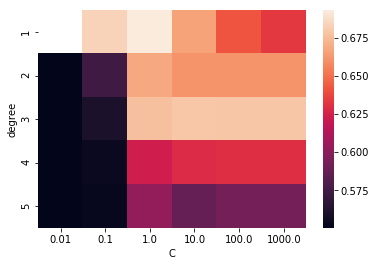

In [42]:
# (b) # Your Code goes here:
accura = DataFrame(result,columns=['degree','C','accura'])
accura = accura.iloc[1:30]
accura = accura.pivot("degree", "C", "accura")
ax = sns.heatmap(accura)

In [45]:
# (c) # Your Code goes here:
accura = DataFrame(result,columns=['degree','C','accura'])
accura = accura.iloc[1:30]
tem = accura["accura"].values
indext =np.argmax(tem)
d = accura.iloc[indext][0]
c = accura.iloc[indext][1]
svm_poly = svm.SVC(kernel ='poly',degree =d,C=c)
svm_poly.fit(X_train, y_train)
ts_pred = svm_poly.predict(X=X_test)
ac = accuracy_score(y_test,ts_pred)
print("accuracy:",ac)


accuracy: 0.6891284815813118


(d) ***Your answer goes here:***
When use the SVM with polynomial kernel with degree =1 and C = 1,the model has better perfomance.When degree is set as 1,the decision boudary of SVM with polynomial kernel is simliar to the decison boudary of logistic regression model, but they still have the different C parameter to adjust the degree of regularisation to get better performance of the model.

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

(a) ***Your answer goes here:***
The SVM with a Linear Kernel and the logistic regression Classifier are all linear classifer. Linear SVM dose not directly depend on data distribution and logistic regression is infulenced by all the data point in dataset. The linear SVM use the support vector to decide the decision boundary and  logistic regression use the maximum probability.

(b) ***Your answer goes here:***
The heat map just help us to know the perfomance of the model is different with the different pairs of C and degree. If we only test the model by adjust C or degree respectively,maybe the combination of  best C and best degree we find in the experiment may not have good performance.

(c) ***Your answer goes here:***
The hold out validation just divides the training dataset and the testing dataset once,which is too random and not so good to select a good model in some situation.The cross validation can improve the generlisation of the model and reduce the infulence brought by the overfitting.
Advantage of cross validation : it can improve the ability of the model to fit new data and reduce the influence of hyperparameters on the randomness of the model.
Disadvantages of cross validation:it is time-consuming and has large computational complexity.

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)